In [47]:
%matplotlib inline

In [1]:
import pandas as pd 
import numpy as np
import json
import re
from tqdm._tqdm_notebook import tqdm_notebook

# Load Data

The data from Yelp reviews is in the files `review.json` and `business.json`, which were downloaded from the following link (the link also contains detailed documentation on the structure and format of the dataset):

https://www.yelp.com/dataset/documentation/json

In [2]:
PATH = '../data/'

In [3]:
with open(PATH+'review.json') as f:
    review_data = pd.DataFrame(json.loads(line) for line in f)

In [4]:
with open(PATH+'business.json') as f:
    business_data = pd.DataFrame(json.loads(line) for line in f)

In [10]:
review_data.shape

(5261669, 9)

In [15]:
business_data.shape

(174567, 15)

The reviews are related to several different types of businesses - we first filter the reviews down to only those related to restaurants.

In [18]:
rest_biz = business_data[business_data['categories'].apply(str).str.contains('Restaurants')]

In [19]:
rest_biz.shape

(54618, 15)

In [20]:
rest_biz.iloc[0]

address                                              581 Howe Ave
attributes      {'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...
business_id                                PfOCPjBrlQAnz__NXj9h_w
categories      [American (New), Nightlife, Bars, Sandwiches, ...
city                                               Cuyahoga Falls
hours           {'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...
is_open                                                         1
latitude                                                  41.1195
longitude                                                -81.4757
name                                     Brick House Tavern + Tap
neighborhood                                                     
postal_code                                                 44221
review_count                                                  116
stars                                                         3.5
state                                                          OH
Name: 4, d

In [168]:
rest_biz = rest_biz.drop(columns=['stars'])

In [169]:
# rest_biz.sort_values(by='review_count', ascending=False, inplace=True)

In [170]:
# rest_biz.groupby(by=['state'])['review_count'].sum().sort_values(ascending=False)

state
NV     949953
AZ     837216
ON     414411
NC     180487
OH     154726
PA     143283
QC      98978
WI      69050
BW      24934
EDH     23747
IL      22186
SC       5981
MLN      1101
HLD       589
C         168
ELN       117
FIF       110
NYK       101
WLN        87
NY         73
NI         58
WA         40
01         24
PKN        24
ST         24
ESX        11
BY         10
KHL         7
RCC         7
XGL         6
3           5
HH          4
CA          4
WHT         4
ABE         3
ZET         3
Name: review_count, dtype: int64

In [21]:
rest_biz.dtypes

address          object
attributes       object
business_id      object
categories       object
city             object
hours            object
is_open           int64
latitude        float64
longitude       float64
name             object
neighborhood     object
postal_code      object
review_count      int64
stars           float64
state            object
dtype: object

In [31]:
review_data.dtypes

business_id    object
cool            int64
date           object
funny           int64
review_id      object
stars           int64
text           object
useful          int64
user_id        object
dtype: object

In [30]:
rest_biz = rest_biz[['business_id']]

In [32]:
rest_biz.dtypes

business_id    object
dtype: object

In [33]:
rest_reviews = pd.merge(review_data, rest_biz, on='business_id')

In [34]:
rest_reviews.shape

(3221419, 9)

In [35]:
rest_reviews.dtypes

business_id    object
cool            int64
date           object
funny           int64
review_id      object
stars           int64
text           object
useful          int64
user_id        object
dtype: object

In [36]:
rest_reviews.iloc[0]

business_id                               0W4lkclzZThpx3V65bVgig
cool                                                           0
date                                                  2016-05-28
funny                                                          0
review_id                                 v0i_UHJMo_hPBq9bxWvW4w
stars                                                          5
text           Love the staff, love the meat, love the place....
useful                                                         0
user_id                                   bv2nCi5Qv5vroFiqKGopiw
Name: 0, dtype: object

In [37]:
rest_reviews = rest_reviews[['text', 'stars']]

In [40]:
rest_reviews.stars.isnull().sum()

0

In [41]:
rest_reviews.text.isnull().sum()

0

In [43]:
rest_reviews.stars.unique()

array([5, 4, 3, 2, 1])

In [45]:
rest_reviews.stars.value_counts()

5    1214484
4     883531
3     451004
1     362143
2     310257
Name: stars, dtype: int64

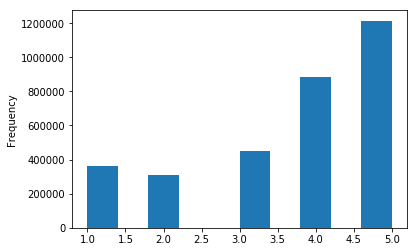

In [48]:
rest_reviews.stars.plot(kind='hist')

Let's pick only polarized reviews - consider 1 and 2 star reviews as bad; 5 star reviews as good.

In [49]:
reviews_good = rest_reviews[rest_reviews.stars == 5]

In [50]:
reviews_good.shape

(1214484, 2)

In [51]:
reviews_bad = rest_reviews[rest_reviews.stars.isin([1, 2])]

In [52]:
reviews_bad.shape

(672400, 2)

Let's look at the length of reviews.

In [57]:
rev_len_good = reviews_good.text.apply(len)

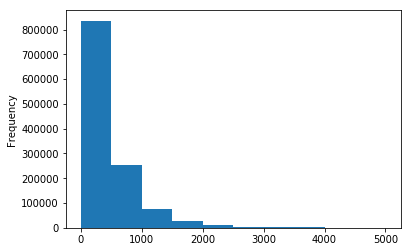

In [62]:
rev_len_good.plot(kind='hist')

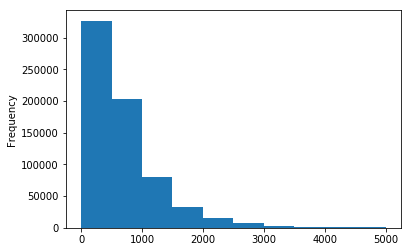

In [65]:
rev_len_bad = reviews_bad.text.apply(len)
rev_len_bad.plot(kind='hist')

Let's subset the sets of good and bad reviews to only include reviews with approximately similar lengths - say, in the range of 400 to 500 characters.

In [89]:
reviews_good = reviews_good[(reviews_good.text.apply(len) <= 500) & (reviews_good.text.apply(len) >= 400)]
reviews_good.shape

(115252, 2)

In [90]:
reviews_bad = reviews_bad[(reviews_bad.text.apply(len) <= 500) & (reviews_bad.text.apply(len) >= 400)]
reviews_bad.shape

(68001, 2)

Let's look at a sample of the good and bad reviews:

In [92]:
reviews_good.text.iloc[100]

'If you want an authentic French pastry and Illy coffee, come here!!! This place is fantastic!!!\n\nThe restaurant is owned by a chef who was named the best pastry chef in the world. You will soon find it why! \n\nI had the chocolate almond croissant. It was the best croissant I have ever had!\n\nMy husband had the chocolate croissant and it was flaky, yummy, perfection.\n\nThere is really not a bad thing in this place!'

In [93]:
reviews_bad.text.iloc[100]

'Sad! This dim sum restaurant used to be quite good (about 4 stars) but lately the quality has come down dramatically.\n\nThis is a problem with many dim sum restaurants in Richmond Hill / Markham, the chefs eventually leave (or are poached away) and the food quality goes down the drain.\n\nUnfortunately I cannot say I will be returning with my family anytime soon.\n\nRestaurant is clean and well kept though, so that is always nice.\n\n2/5 stars.'

In [95]:
# save dataframe of good and bad reviews
reviews_labeled = pd.concat([reviews_good, reviews_bad], axis=0, ignore_index=True)

In [96]:
reviews_labeled.shape

(183253, 2)

In [100]:
reviews_labeled.stars.unique()

array([5, 1, 2])

In [103]:
# create a column called is_positive that marks a review as positive (1) if 5 stars,
# and negative (0) otherwise.
reviews_labeled['is_positive'] = reviews_labeled.stars.apply(lambda x: 1 if x == 5 else 0)

In [114]:
reviews_labeled.iloc[183053]

text           It's alright. \nFood sometimes looks like its ...
stars                                                          2
is_positive                                                    0
Name: 183053, dtype: object

In [116]:
# drop stars column
reviews_labeled.drop(['stars'], axis=1, inplace=True)

In [117]:
reviews_labeled.shape

(183253, 2)

In [118]:
# there are more positive reviews than -ve reviews (68,001) - let's balance the labeled data
reviews_pos_random = reviews_labeled[reviews_labeled.is_positive == 1].sample(n=68001, replace=False)
reviews_labeled = pd.concat([reviews_pos_random, reviews_labeled[reviews_labeled.is_positive == 0]])
reviews_labeled.reset_index(inplace=True, drop=True)
reviews_labeled.to_feather('../data/reviews_labeled.feather')   # save to a feather file